# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 
Make sure that you've submitted the module 5 notebook and unlocked Module 6 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt

In [2]:
adaniports = pd.read_csv("ADANIPORTS.csv")
adanipower = pd.read_csv("ADANIPOWER.csv")
ajantpharm = pd.read_csv("AJANTPHARM.csv")
amarajabat = pd.read_csv("AMARAJABAT.csv")
apollotyre = pd.read_csv("APOLLOTYRE.csv")
ashoka = pd.read_csv("ASHOKA.csv")
asianpaint = pd.read_csv("ASIANPAINT.csv")
axisbank = pd.read_csv("AXISBANK.csv")
bajajelec = pd.read_csv("BAJAJELEC.csv")
bajfinance = pd.read_csv("BAJFINANCE.csv")
bergepaint = pd.read_csv("BERGEPAINT.csv")
bomdyeing = pd.read_csv("BOMDYEING.csv")
bpcl = pd.read_csv("BPCL.csv")
castrolind = pd.read_csv("CASTROLIND.csv")
centuryply = pd.read_csv("CENTURYPLY.csv")
cipla = pd.read_csv("CIPLA.csv")
cumminsind = pd.read_csv("CUMMINSIND.csv")
dhfl = pd.read_csv("DHFL.csv")
drreddy = pd.read_csv("DRREDDY.csv")
eichermot = pd.read_csv("EICHERMOT.csv")
exideind = pd.read_csv("EXIDEIND.csv")
fortis = pd.read_csv("FORTIS.csv")
gail = pd.read_csv("GAIL.csv")
gmrinfra = pd.read_csv("GMRINFRA.csv")
gujalkali = pd.read_csv("GUJALKALI.csv")
hdfc = pd.read_csv("HDFC.csv")
idfc = pd.read_csv("IDFC.csv")
ircon = pd.read_csv("IRCON.csv")
itdc = pd.read_csv("ITDC.csv")
jetairways = pd.read_csv("JETAIRWAYS.csv")

In [13]:
cols = ['adaniports','adanipower','ajantpharm','amarajabat','apollotyre','ashoka','asianpaint','axisbank','bajajelec','bajfinance','bergepaint','bomdyeing','bpcl','castrolind','centuryply','cipla','cumminsind','dhfl','drreddy','eichermot','exideind','fortis','gail','gmrinfra','gujalkali','hdfc','idfc','ircon','itdc','jetairways']
data =  pd.DataFrame(columns = cols)

data['adaniports'] = adaniports['Close Price']
data['adanipower'] = adanipower['Close Price']
data['ajantpharm'] = ajantpharm['Close Price']
data['amarajabat'] = amarajabat['Close Price']
data['apollotyre'] = apollotyre['Close Price']
data['ashoka'] = ashoka['Close Price']
data['asianpaint'] = asianpaint['Close Price']
data['axisbank'] = axisbank['Close Price']
data['bajajelec'] = bajajelec['Close Price']
data['bajfinance'] = bajfinance['Close Price']
data['bergepaint'] = bergepaint['Close Price']
data['bomdyeing'] = bomdyeing['Close Price']
data['bpcl'] = bpcl['Close Price']
data['castrolind'] = castrolind['Close Price']
data['centuryply'] = centuryply['Close Price']
data['cipla'] = cipla['Close Price']
data['cumminsind'] = cumminsind['Close Price']
data['dhfl'] = dhfl['Close Price']
data['drreddy'] = drreddy['Close Price']
data['eichermot'] = eichermot['Close Price']
data['exideind'] = exideind['Close Price']
data['fortis'] = fortis['Close Price']
data['gail'] = gail['Close Price']
data['gmrinfra'] = gmrinfra['Close Price']
data['gujalkali'] = gujalkali['Close Price']
data['hdfc'] = hdfc['Close Price']
data['idfc'] = idfc['Close Price']
data['ircon'] = ircon['Close Price']
data['itdc'] = itdc['Close Price']
data['jetairways'] = jetairways['Close Price']


In [14]:
from math import sqrt
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)
dt = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
cleaned_data = np.where(np.isnan(dt), 0, dt)

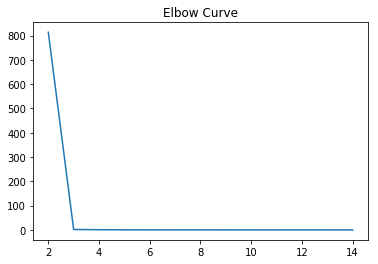

In [16]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
X = cleaned_data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

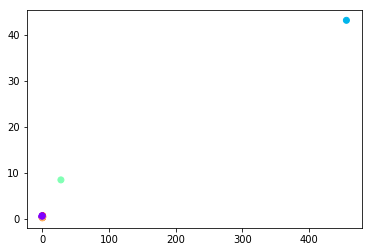

In [18]:
from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(dt,5)

In [10]:

idx,_ = vq(dt,centroids)

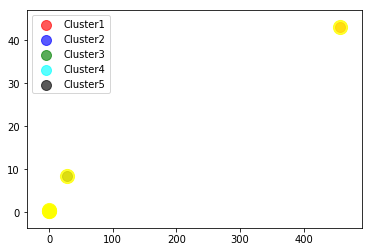

In [11]:
from pylab import plot,show
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [62]:
print(returns.idxmax())

Returns       hdfc
Volatility    hdfc
dtype: object


In [63]:
returns.drop('hdfc',inplace=True)
#recreate data to feed into the algorithm
dt = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

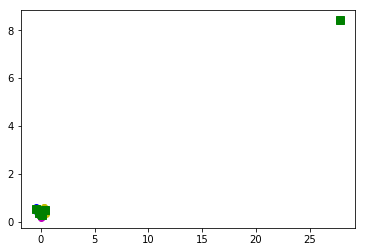

In [64]:
centroids,_ = kmeans(dt,5)
# assign each sample to a cluster
idx,_ = vq(dt,centroids)
# some plotting using numpy's logical indexing
plot(dt[idx==0,0],dt[idx==0,1],'ob',
     dt[idx==1,0],dt[idx==1,1],'oy',
     dt[idx==2,0],dt[idx==2,1],'or',
     dt[idx==3,0],dt[idx==3,1],'og',
     dt[idx==4,0],dt[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()